In [31]:
# Importing the Library
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
warnings.filterwarnings('ignore')
import scipy

In [2]:
#reading data and checking how it looks
data=pd.read_csv("./data/gapmiderData.csv")
#Our Interest of Columns are country, alcconsumption, co2emissions, lifeexpectancy
dataInterest=data[["country","alcconsumption","employrate","lifeexpectancy","incomeperperson"]]
dataInterest["alcconsumption"]=pd.to_numeric(dataInterest["alcconsumption"],errors='coerce')
dataInterest["employrate"]=pd.to_numeric(dataInterest["employrate"],'coerce')
dataInterest["lifeexpectancy"]=pd.to_numeric(dataInterest["lifeexpectancy"],'coerce')
dataInterest["incomeperperson"]=pd.to_numeric(dataInterest["incomeperperson"],'coerce')
dataInterest.shape

(213, 5)

In [3]:
dataInterest=dataInterest.dropna()
print(dataInterest.shape)
# Next we will remove out the countries that have alcohol consumption less than 1 litres to make the analysis more significant
dataInterest=dataInterest[dataInterest["alcconsumption"]>1]

(162, 5)


In [4]:
dataInterest["alcconsumptioncentered"]=dataInterest["alcconsumption"]-dataInterest["alcconsumption"].mean()
print("Mean Value for alcohol consumption variable ",dataInterest["alcconsumptioncentered"].mean())

Mean Value for alcohol consumption variable  3.825511336279825e-15


In [5]:
# Let's build a simple linear regression model

model=smf.ols("lifeexpectancy ~ alcconsumptioncentered",data=dataInterest).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     13.62
Date:                Sun, 09 May 2021   Prob (F-statistic):           0.000321
Time:                        18:48:46   Log-Likelihood:                -516.71
No. Observations:                 140   AIC:                             1037.
Df Residuals:                     138   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69

In [6]:
'''The p value is significant but the R-squared:0.091 value is pretty low, indicating the linear model captures only 9% variablity '''

'The p value is significant but the R-squared:0.091 value is pretty low, indicating the linear model captures only 9% variablity '

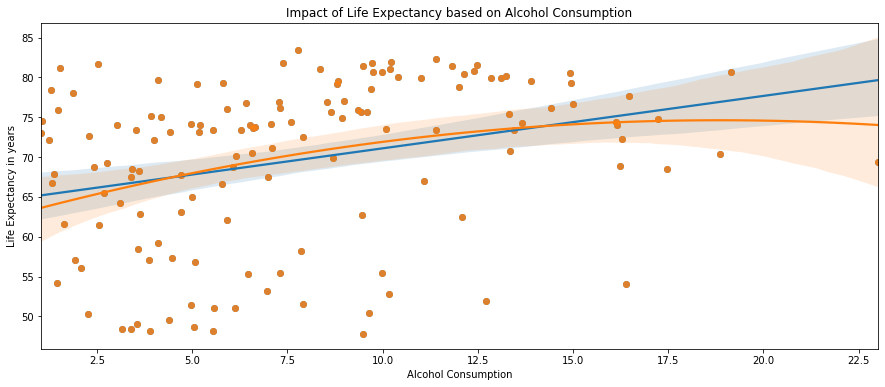

In [7]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataInterest["alcconsumption"],y=dataInterest["lifeexpectancy"])
sns.regplot(x=dataInterest["alcconsumption"],y=dataInterest["lifeexpectancy"],order=2)

plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy in years");
plt.title("Impact of Life Expectancy based on Alcohol Consumption");

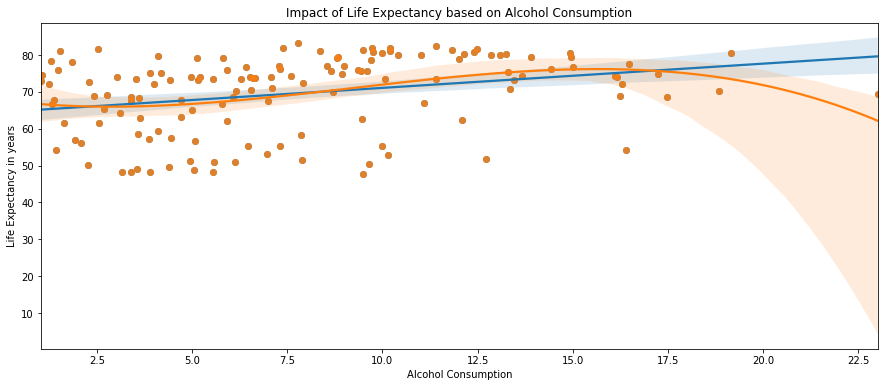

In [8]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataInterest["alcconsumption"],y=dataInterest["lifeexpectancy"])
sns.regplot(x=dataInterest["alcconsumption"],y=dataInterest["lifeexpectancy"],order=3)
plt.xlabel("Alcohol Consumption")
plt.ylabel("Life Expectancy in years");
plt.title("Impact of Life Expectancy based on Alcohol Consumption");

In [9]:
''' The third order seems to capture the trend better let's add third order polynomial'''

" The third order seems to capture the trend better let's add third order polynomial"

In [10]:
# Let's build a simple linear regression model

model=smf.ols("lifeexpectancy ~ alcconsumptioncentered + I(alcconsumptioncentered**3)",data=dataInterest).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     9.176
Date:                Sun, 09 May 2021   Prob (F-statistic):           0.000182
Time:                        18:48:51   Log-Likelihood:                -514.50
No. Observations:                 140   AIC:                             1035.
Df Residuals:                     137   BIC:                             1044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

 ### By adding third degree polynomial the R squared improve but still the R Sqaure is around 12% so let's add more explanatory variables

Let's add Income per person as the other explanatory variable and check the correlation of it

In [11]:
dataInterest["incomeperpersonC"]=dataInterest["incomeperperson"]-dataInterest["incomeperperson"].mean()
print(dataInterest["incomeperpersonC"].mean())

-6.626318541488477e-13


In [12]:
model=smf.ols("lifeexpectancy ~ alcconsumptioncentered + I(alcconsumptioncentered**3)+incomeperpersonC",data=dataInterest).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     29.07
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.38e-14
Time:                        18:48:51   Log-Likelihood:                -488.62
No. Observations:                 140   AIC:                             985.2
Df Residuals:                     136   BIC:                             997.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### After adding Income per person the alcohol consumption variable becomes statistically insignificant and R Square value also increased to 38%`

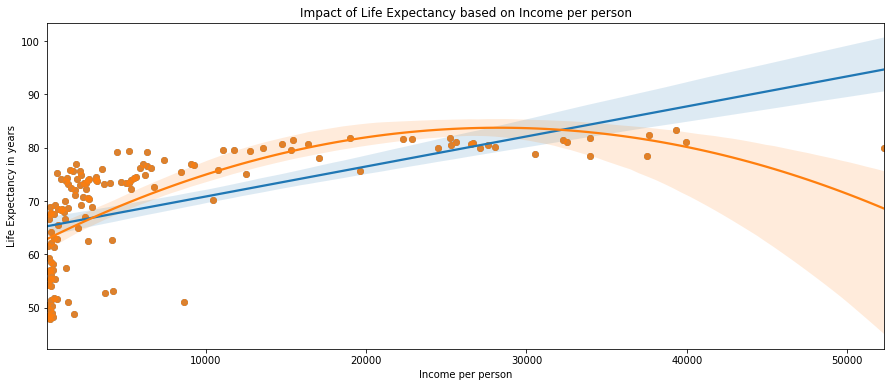

In [13]:
fig=plt.subplots(figsize=(15,6))
sns.regplot(x=dataInterest["incomeperperson"],y=dataInterest["lifeexpectancy"])
sns.regplot(x=dataInterest["incomeperperson"],y=dataInterest["lifeexpectancy"],order=2)

plt.xlabel("Income per person")
plt.ylabel("Life Expectancy in years");
plt.title("Impact of Life Expectancy based on Income per person");

#### As the second order polynomial seems to capture the trend we will add second order polynomial for incomperperson 

In [14]:
model=smf.ols("lifeexpectancy ~ incomeperpersonC+I(incomeperpersonC**2)",data=dataInterest).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     64.71
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.63e-20
Time:                        18:48:53   Log-Likelihood:                -476.74
No. Observations:                 140   AIC:                             959.5
Df Residuals:                     137   BIC:                             968.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### The second order polynomial is statistically significant and also increase the R Square value by around 10%

Let's add one more variable employment rate and check if it's statistically significant and how does the R Square value changes with it

In [28]:
dataInterest["employrateC"]=dataInterest["employrate"]-dataInterest["employrate"].mean()
print(dataInterest["employrateC"].mean())

2.842170943040401e-15


In [29]:
model=smf.ols("lifeexpectancy ~ incomeperpersonC+I(incomeperpersonC**2)+employrateC",data=dataInterest).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     54.98
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.44e-23
Time:                        18:52:25   Log-Likelihood:                -467.71
No. Observations:                 140   AIC:                             943.4
Df Residuals:                     136   BIC:                             955.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

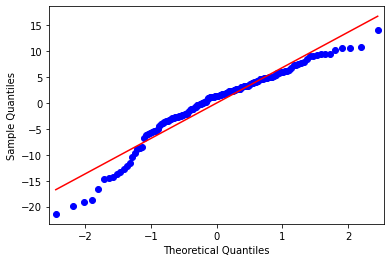

In [34]:
fig=sm.qqplot(model.resid,line='r')

In [35]:
stdres=pd.DataFrame(model.resid_pearson)

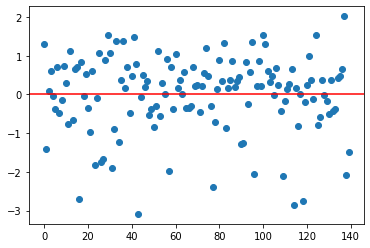

In [40]:
fig=plt.plot(stdres,'o',ls='None')
line=plt.axhline(y=0,color='r')

#### So most of the values are within 2 standard deviations

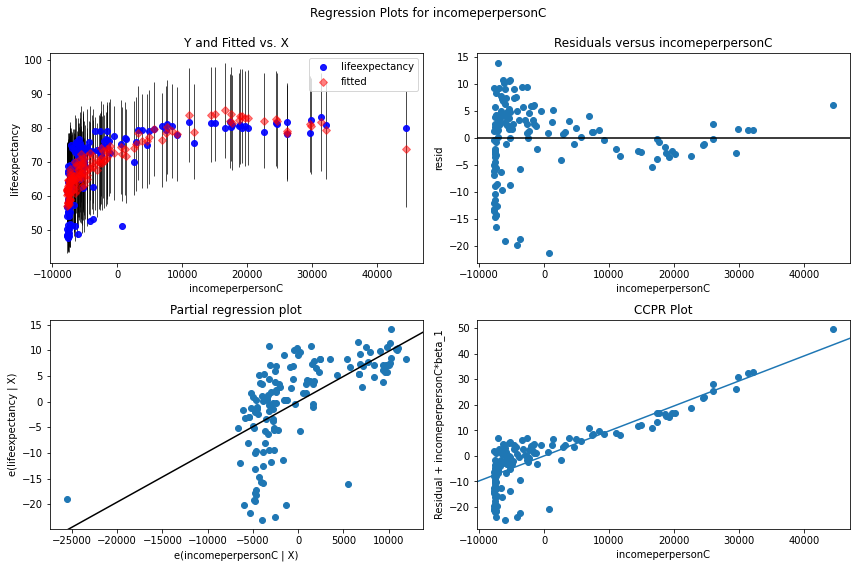

In [49]:
fig2 = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model,'incomeperpersonC',fig=fig2)

#### so the lower value of income per person seems to not fit well with the model

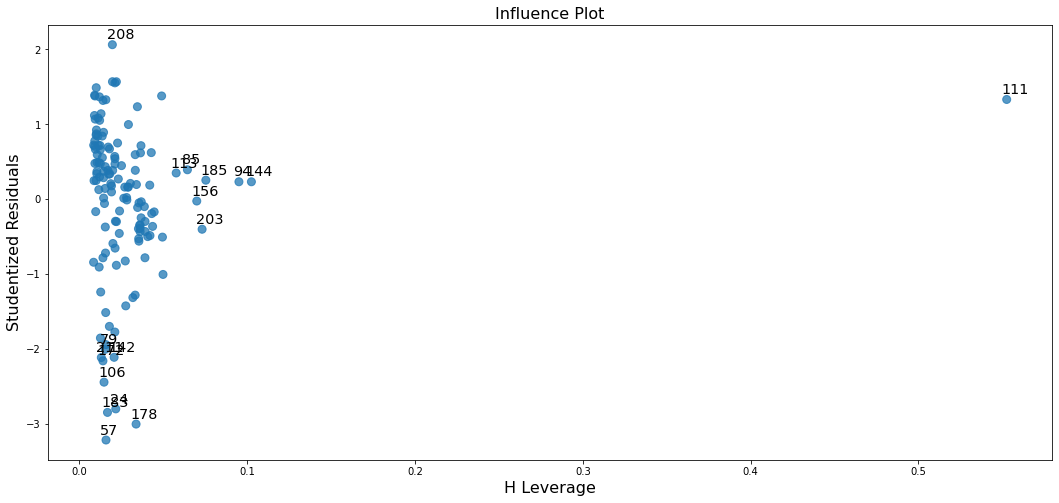

In [60]:
fig3,ax= plt.subplots(figsize=(18,8))
fig=sm.graphics.influence_plot(model,ax=ax,size=8)